# __Python - BANA8090 Spring 2020 Final Project__

Vidhi Bansal, Individual Final Project Submission

## __Project Description__

Aim : Predicting a person will have Diabetes with demographic features, diet and body measurements. 

## __Datasets__

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. Following Datasets are of survey conducted by NHANES in the year 2013-2014


Demography Dataset : https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Demographics&CycleBeginYear=2013 <br>
Laboratory Dataset : https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Laboratory&CycleBeginYear=2013 <br>
Examinations Dataset : https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Examination&CycleBeginYear=2013 <br>
Diet Dataset : https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Dietary&CycleBeginYear=2013 <br>
Questionnaire Dataset : https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Questionnaire&CycleBeginYear=2013 <br>
Comprehensive Collection of Datasets : https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey

## __Libraries Used__

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import re
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



#### __Read the datasets__

In [4]:
demography = pd.read_csv('demographic.csv')
labs = pd.read_csv('labs.csv')
examination = pd.read_csv('examination.csv')
diet = pd.read_csv('diet.csv')
questionnaire = pd.read_csv('questionnaire.csv')

In [7]:
labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [10]:
labs.shape

(9813, 424)

In [8]:
examination.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [11]:
examination.shape

(9813, 224)

In [9]:
demography.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [12]:
demography.shape

(10175, 47)

In [13]:
diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [14]:
diet.shape

(9813, 168)

In [23]:
questionnaire.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [16]:
questionnaire.shape

(10175, 953)

#### __Merge Datasets__

In [83]:
final = pd.merge(labs,examination, on ='SEQN',how='inner')

In [84]:
final = pd.merge(final,demography, on='SEQN', how='inner')

In [85]:
final = pd.merge(final,diet, on='SEQN', how='inner')

In [86]:
final = pd.merge(final,questionnaire, on='SEQN', how='inner')

In [87]:
final.shape

(9813, 1812)

We have 9813 records and 1812 variables.

#### __Summary Statistics__

In [88]:
final.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4064.000000,4870.000000,2688.000000,5914.000000,5836.000000,1478.000000,1478.000000,1478.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,400.188238,553.871663,367.752976,311.741123,553.798492,2.583221,2.299729,1.746955
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1471.400188,1943.995173,1700.211868,1060.053377,7148.984994,0.784612,1.213281,0.709430
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,197.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [89]:
final.columns

Index(['SEQN', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT',
       'WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'LBXSAL',
       ...
       'WHD080U', 'WHD080L', 'WHD110', 'WHD120', 'WHD130', 'WHD140', 'WHQ150',
       'WHQ030M', 'WHQ500', 'WHQ520'],
      dtype='object', length=1812)

#### __Missing values analysis__

In [91]:
missing_values = final.isnull().sum()

In [92]:
(missing_values/len(final))*100

SEQN         0.000000
URXUMA      17.945582
URXUMS      17.945582
URXUCR.x    17.945582
URXCRS      17.945582
              ...    
WHD140      39.733007
WHQ150      40.527871
WHQ030M     84.938347
WHQ500      84.938347
WHQ520      84.938347
Length: 1812, dtype: float64

__After referring to data dictionary, renaming some columns for easier understanding__

In [95]:
final = final.rename(columns = {'SEQN' : 'UID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US',
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'Haemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed',
                               'RIDAGEYR': 'Age',
                               'DR1TCARB':'Carbohydrate_intake',
                               'DR1TCHOL':'Cholestrol',
                               'DR1TSUGR':'Total_sugar',
                               'BMXWT':'Weight',
                               'Plasma Fasting Glucose':'Fasting_Glucose',
                               'MCQ300c':'biological_diabtic_history'})

__Subsetting the dataset with the columns of interest__

In [96]:
final = final.loc[:, ['UID', 'Gender', 'Years_in_US', 'Family_income','Haemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed','Age','Carbohydrate_intake','Cholestrol','Total_sugar','Weight','Insulin','Fasting_Glucose','biological_diabtic_history']]

In [204]:
missing_values = final.isnull().sum()
(missing_values/len(final))*100

UID                    0.0
Gender                 0.0
Family_income          0.0
Haemoglobin            0.0
ArmCircum              0.0
SaggitalAbdominal      0.0
GripStrength           0.0
Breast_fed             0.0
Age                    0.0
Carbohydrate_intake    0.0
Cholestrol             0.0
Total_sugar            0.0
Weight                 0.0
Diabetes               0.0
dtype: float64

__Since 'Years_in_US', 'Insulin','Fasting_Glucose','biological_diabtic_history' have high percentage of missing values, imputing values or removing NA's will impact our analysis. So they are not taken account for further anlaysis.__

In [99]:
final = final.loc[:, ['UID', 'Gender', 'Family_income','Haemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed','Age','Carbohydrate_intake','Cholestrol','Total_sugar','Weight']]

In [101]:
final.describe()

,UID,Gender,Family_income,Haemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Age,Carbohydrate_intake,Cholestrol,Total_sugar,Weight
count,9813.000000,9813.000000,9083.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000,9813.000000,8531.000000,8531.000000,8531.000000,9723.000000
mean,78644.559971,1.507694,2.248930,5.642556,28.485765,21.114034,63.054891,1.984528,31.629573,242.737141,262.368655,109.302640,62.599054
std,2938.592266,0.499966,1.629325,1.004850,7.961971,4.963949,25.098439,0.123426,24.397553,123.956800,233.579131,73.340526,32.331616
min,73557.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000,0.000000,8.670000,0.000000,0.130000,3.100000
25%,76092.000000,1.000000,0.880000,5.200000,22.600000,17.300000,45.600000,2.000000,10.000000,158.720000,107.000000,61.180000,37.950000
50%,78643.000000,2.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000,27.000000,223.300000,193.000000,93.980000,65.300000
75%,81191.000000,2.000000,3.580000,5.800000,34.000000,24.400000,80.700000,2.000000,52.000000,301.165000,352.000000,138.720000,83.500000
max,83731.000000,2.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000,80.000000,1423.870000,3515.000000,1115.500000,222.600000


#### __Missing values imputation__

In [203]:
#GlycoHemoglobin, Saggital Abdominal(median)
final['Haemoglobin'] = final['Haemoglobin'].fillna(final['Haemoglobin'].median())
final['SaggitalAbdominal'] = final['SaggitalAbdominal'].fillna(final['SaggitalAbdominal'].median())
final['ArmCircum'] = final['ArmCircum'].fillna(final['ArmCircum'].median())
final['GripStrength'] = final['GripStrength'].fillna(final['GripStrength'].median())

#Breat_fed -> fill to 1 (since there are many 2's)
final['Breast_fed'] = final['Breast_fed'].fillna(value = 1)

#Age, Cholestrol, Total_sugar, Carbohydrates, 'Weight' (Mean)
final['Age'] = final['Age'].fillna(final['Age'].mean())
final['Cholestrol'] = final['Cholestrol'].fillna(final['Cholestrol'].mean())
final['Total_sugar'] = final['Total_sugar'].fillna(final['Total_sugar'].mean())
final['Carbohydrate_intake'] = final['Carbohydrate_intake'].fillna(final['Carbohydrate_intake'].mean())
final['Weight'] = final['Weight'].fillna(final['Weight'].mean())



__Creating the response variable__
__According to Haemoglobin AIC levels, 0-> Normal status 1-> High-risk diabetes 2-> Diabetic patient__

In [104]:
final.loc[final['Haemoglobin'] < 6.0, 'Diabetes'] = 0
final.loc[(final['Haemoglobin'] >= 6.0) & (final['Haemoglobin'] <= 6.4), 'Diabetes'] = 1
final.loc[final['Haemoglobin'] >= 6.5, 'Diabetes'] = 2

In [205]:
final.describe()

,UID,Gender,Family_income,Haemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Age,Carbohydrate_intake,Cholestrol,Total_sugar,Weight,Diabetes
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.00000,9813.000000,9813.000000
mean,78644.559971,1.507694,2.246474,5.564201,28.528248,21.004545,62.455233,1.868949,31.629573,242.737141,262.368655,109.30264,62.599054,0.182921
std,2938.592266,0.499966,1.630113,0.834491,7.753571,4.261142,22.228196,0.337473,24.397553,115.575585,217.785913,68.38168,32.182995,0.522102
min,73557.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000,0.000000,8.670000,0.000000,0.13000,3.100000,0.000000
25%,76092.000000,1.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000,10.000000,168.100000,119.000000,66.13000,38.500000,0.000000
50%,78643.000000,2.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000,27.000000,242.570000,230.000000,104.54000,65.100000,0.000000
75%,81191.000000,2.000000,3.580000,5.600000,33.800000,22.900000,73.300000,2.000000,52.000000,286.010000,316.000000,129.98000,83.300000,0.000000
max,83731.000000,2.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000,80.000000,1423.870000,3515.000000,1115.50000,222.600000,2.000000


#### __Correlation matrix and Pairplot__

In [106]:
corr = final.corr()
round(corr,2)

,UID,Gender,Family_income,Haemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Age,Carbohydrate_intake,Cholestrol,Total_sugar,Weight,Diabetes
UID,1.00,-0.01,0.02,-0.00,0.01,-0.01,-0.01,-0.01,0.01,0.02,0.00,0.01,0.00,-0.00
Gender,-0.01,1.00,-0.02,-0.01,-0.04,-0.05,-0.42,0.01,0.03,-0.19,-0.16,-0.13,-0.08,-0.02
Family_income,0.02,-0.02,1.00,0.00,0.10,0.01,0.11,0.04,0.17,-0.00,0.03,-0.05,0.10,0.03
Haemoglobin,-0.00,-0.01,0.00,1.00,0.20,0.31,0.01,-0.00,0.33,-0.04,0.05,-0.06,0.21,0.79
ArmCircum,0.01,-0.04,0.10,0.20,1.00,0.60,0.47,0.15,0.58,0.15,0.21,0.07,0.93,0.28
SaggitalAbdominal,-0.01,-0.05,0.01,0.31,0.60,1.00,0.32,0.05,0.39,-0.01,0.09,-0.01,0.61,0.34
GripStrength,-0.01,-0.42,0.11,0.01,0.47,0.32,1.00,0.11,0.20,0.18,0.22,0.12,0.49,0.05
Breast_fed,-0.01,0.01,0.04,-0.00,0.15,0.05,0.11,1.00,0.09,0.00,0.00,0.00,0.17,0.03
Age,0.01,0.03,0.17,0.33,0.58,0.39,0.20,0.09,1.00,0.03,0.13,-0.04,0.61,0.41
Carbohydrate_intake,0.02,-0.19,-0.00,-0.04,0.15,-0.01,0.18,0.00,0.03,1.00,0.33,0.84,0.17,-0.04


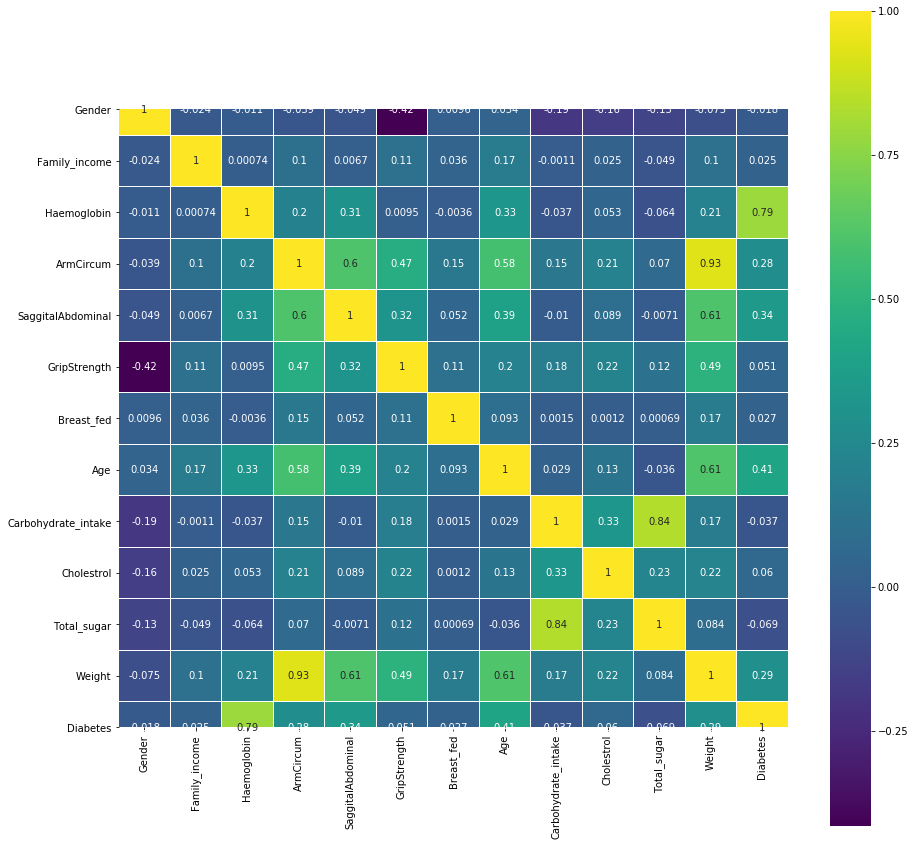

In [206]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
sns.heatmap(final.astype(float).drop(axis=1, labels='UID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

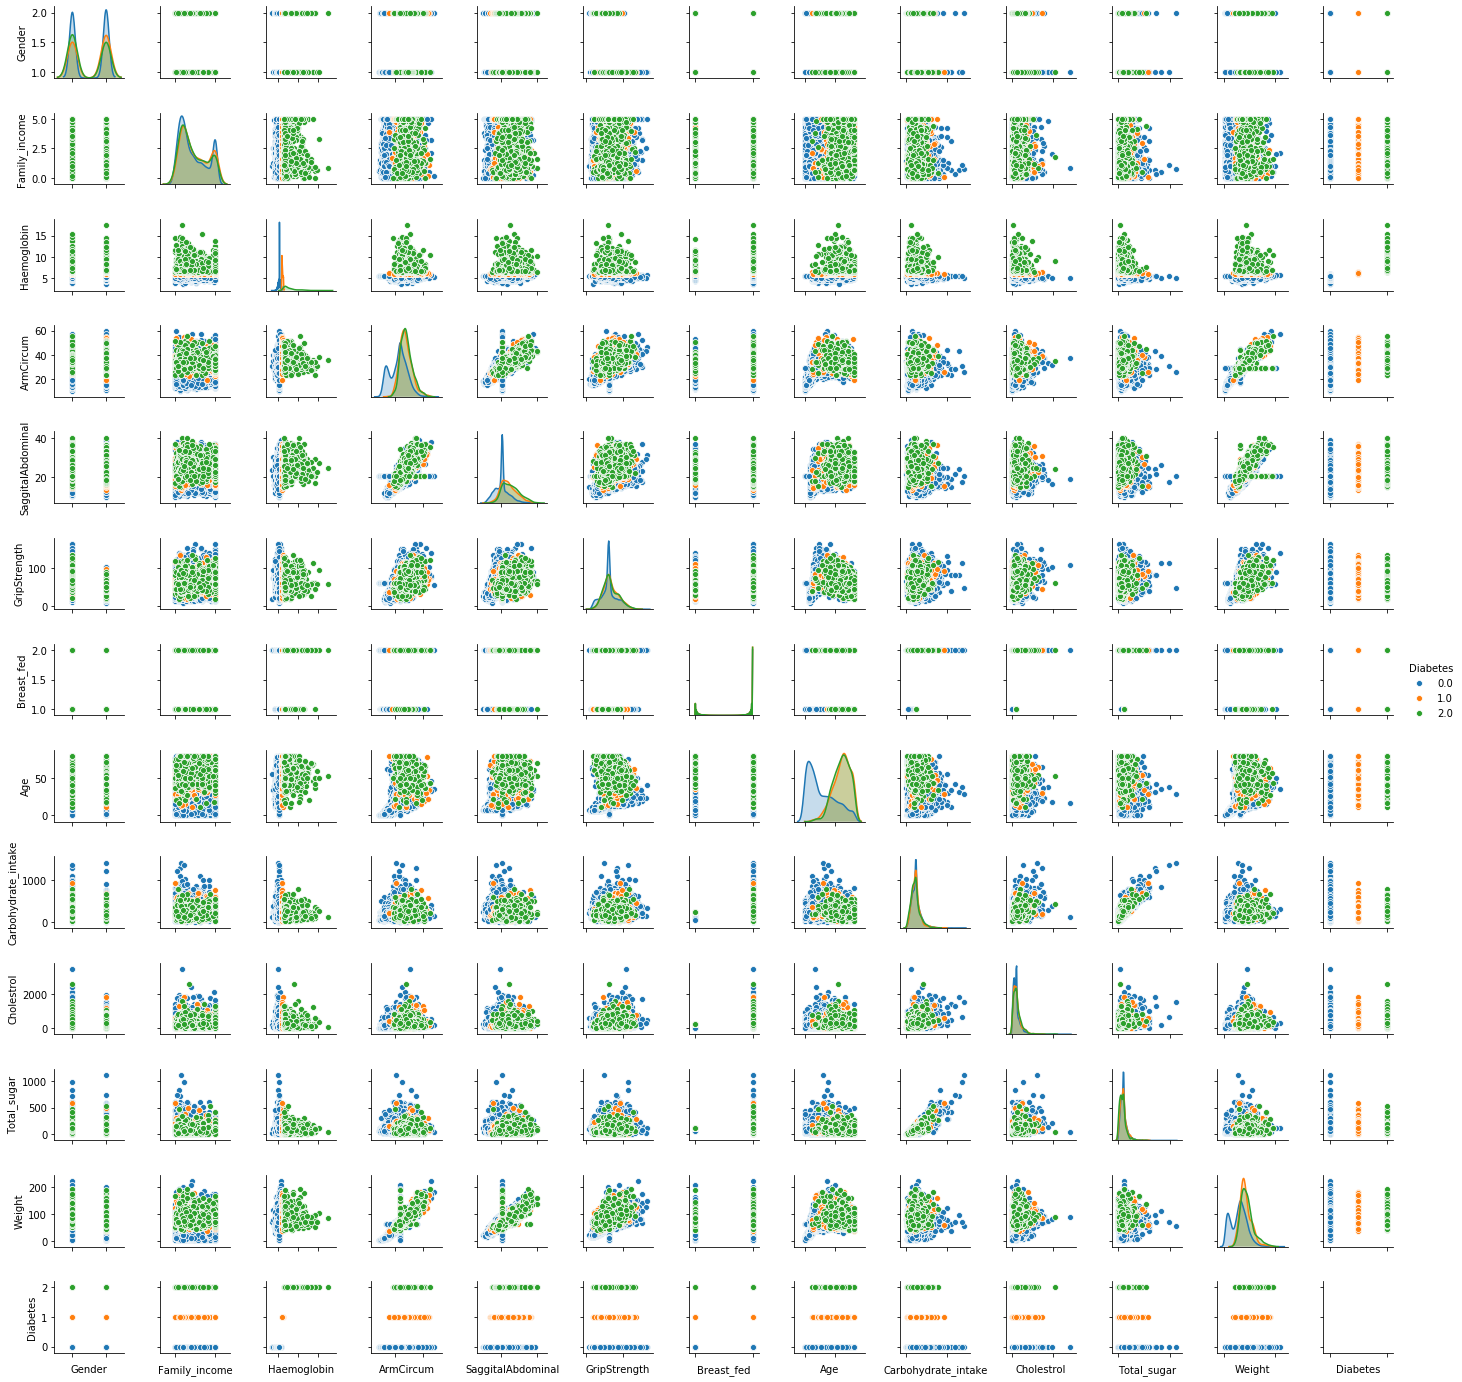

In [169]:
#Pairplot
show = sns.pairplot(final.drop(['UID'], axis=1), hue='Diabetes', size=1.5, diag_kind='kde')
show.set(xticklabels=[])

In [208]:
from sklearn.linear_model import LogisticRegression
logistic_Reg = LogisticRegression()

In [210]:
logistic_Reg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
logistic_Reg.predict(test_X)

array([0., 0., 0., ..., 0., 0., 0.])

In [213]:
logistic_Reg.score(test_X, test_y)

0.8660213958227203

__Variables of interest as per pair plot and correlation matrix are - ArmCircum, SaggitalAbdominal, Age, Carbohydrate_intake, Weight__

In [209]:
#first linear model
#Indicators -> attributes, Response -> diabetes
Indicators = final.drop(['Diabetes'], axis=1)
Response = final[['Diabetes']]

#seperate training set and test set
train_X, test_X, train_y, test_y = train_test_split(Indicators, Response, test_size=0.2, random_state=13457)


#create linear regression fit
lin_model = LinearRegression(fit_intercept=True)  
#lin_model = linear_model.LinearRegression()

#training via linear regression model
lin_model.fit(train_X, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
lin_model.score(X=test_X, y=test_y )

0.21374198557471624

In [152]:
lin_prediction_diabetes = lin_model.predict(test_X)
lin_prediction_diabetes

array([[ 0.04531041],
       [ 0.11346012],
       [ 0.05918715],
       ...,
       [ 0.36727012],
       [ 0.19667465],
       [-0.00184852]])

In [153]:
mean_squared_error(test_y, lin_prediction_diabetes)


0.2036408813838011

In [154]:
r2_score(test_y, lin_prediction_diabetes)

0.21374198557471624

In [164]:
lin_prediction_diabetes.shape

(3813, 1)

In [166]:
test_y.shape

(3813, 1)

In [167]:
test_X.shape

(3813, 12)

In [168]:
#test_y = test_y.values.reshape() 
#df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': lin_prediction_diabetes.flatten()})

#Actual = (test_y.flatten())
#Actual
#df = pd.DataFrame({'Actual': test_y, 'Predicted': lin_prediction_diabetes},index=[0])
#df
#plt.scatter(test_X, test_y,  color='gray')
#plt.plot(test_X, lin_prediction_diabetes, color='red', linewidth=2)
#plt.show()

In [136]:
#second model
Indicators = final.drop(['Diabetes','Haemoglobin'], axis=1)
Response_H = final[['Haemoglobin']]

#seperate training set and test set
train_X_H = Indicators[:6000]
test_X_H = Indicators[6000:]
train_y_H = Response_H[:6000]
test_y_H = Response_H[6000:]

#create linear regression fit
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=True)  
#lin_model = linear_model.LinearRegression()

#training via linear regression model
lin_model.fit(train_X_H, train_y_H)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
lin_model.score(X=test_X_H, y=test_y_H )

0.16227631872303716

In [138]:
lin_prediction_diabetes = lin_model.predict(test_X_H)
mean_squared_error(test_y_H, lin_prediction_diabetes)

0.5515463650384909

In [139]:
r2_score(test_y_H, lin_prediction_diabetes)

0.16227631872303716

In [145]:
#As per MSE, first model is better as lower MSE, the better the model is.

In [170]:
#Third model
Indicators_3 = final.drop(['Gender','Diabetes','Family_income','GripStrength','Breast_fed','Cholestrol','Total_sugar','Carbohydrate_intake','Weight'], axis=1)
Response_3 = final[['Diabetes']]

#seperate training set and test set
train_X_3 = Indicators_3[:6000]
test_X_3 = Indicators_3[6000:]
train_y_3 = Response_3[:6000]
test_y_3 = Response_3[6000:]

#create linear regression fit
lin_model = LinearRegression(fit_intercept=True)  
#lin_model = linear_model.LinearRegression()

#training via linear regression model
lin_model.fit(train_X_3, train_y_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
lin_model.score(X=test_X_3, y=test_y_3 )

0.62380564317786

In [172]:
lin_prediction_diabetes = lin_model.predict(test_X_3)
mean_squared_error(test_y_3, lin_prediction_diabetes)

0.09743436504220548

In [173]:
r2_score(test_y_3, lin_prediction_diabetes)

0.62380564317786

In [174]:
#Classification model
Features = final.drop(['Gender','Diabetes','Family_income','GripStrength','Breast_fed','Cholestrol','Total_sugar','Carbohydrate_intake','Weight'], axis=1)
Response = final[['Diabetes']]
X_train, X_test, y_train, y_test = train_test_split(Features, Response, test_size=0.2, random_state=13457)


In [175]:
model = GaussianNB()
model.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.97
Accuracy of GNB classifier on test set: 0.97


In [180]:
prediction_diabetes = model.predict(X_test)
mean_squared_error(y_test, prediction_diabetes)

0.05756495160468671

In [178]:
dec_tree = DecisionTreeClassifier(random_state=12)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12, splitter='best')

In [181]:
dec_tree.score(X_test,y_test)

1.0

In [182]:
prediction_diabetes = dec_tree.predict(X_test)
mean_squared_error(y_test, prediction_diabetes)


0.0

In [183]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_diabetes))

Accuracy: 1.0
